# Dicision tree 2A

In [2]:
import numpy as np
import pandas as pd
from sklearn import tree

input_file = "C:\\Users\\Admin\\OneDrive\\Documents\\Python\\Assignment\\Decision tree A\\Past hires 2.xlsx"

df = pd.read_excel(input_file, header = 0)
df.head()

,Education,Top-tier school,Interned,Hired
0,CS,N,N,N
1,ME,N,N,Y
2,EE,N,N,N
3,AE,Y,N,Y
4,IS,Y,N,N


In [3]:
d = {'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
#df['Top-tier school'] = df['Top-tier school'].map(d)

#d = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4,'5': 5, '7': 6, '10': 7, '15': 8, '20': 9}
df['Interned'] = df['Interned'].map(d)

#d = {'0': 0, '1': 1, '2': 2, '4': 3, '5': 4, '6': 5}
#df['Previous employers'] = df['Previous employers'].map(d)

#df['Interned'] = df['Interned'].map(d)
d = {'CS': 0, 'ME': 1, 'EE': 2, 'AE': 3, 'IS': 4, 'CE': 5, 'MCS': 6, 'MAE': 7, 'MME': 8}
df['Education'] = df['Education'].map(d)
df.head(13)


,Education,Top-tier school,Interned,Hired
0,0,0,0,0
1,1,0,0,1
2,2,0,0,0
3,3,1,0,1
4,4,1,0,0
5,1,1,1,1
6,5,0,1,1
7,1,0,1,1
8,3,0,0,1
9,4,0,0,1


In [4]:
features = list(df.columns[:3])
features

['Education', 'Top-tier school', 'Interned']

In [5]:
y = df["Hired"]
X = df[features]
clf = tree.DecisionTreeClassifier(min_samples_leaf= 1, min_samples_split = 3)
clf = clf.fit(X,y)
clf

DecisionTreeClassifier(min_samples_split=3)

In [6]:
import os
os.environ["PATH"] += os.pathsep + "C:\\Program Files\\Graphviz\\bin"  # Replace with the actual path to the GraphViz bin folder

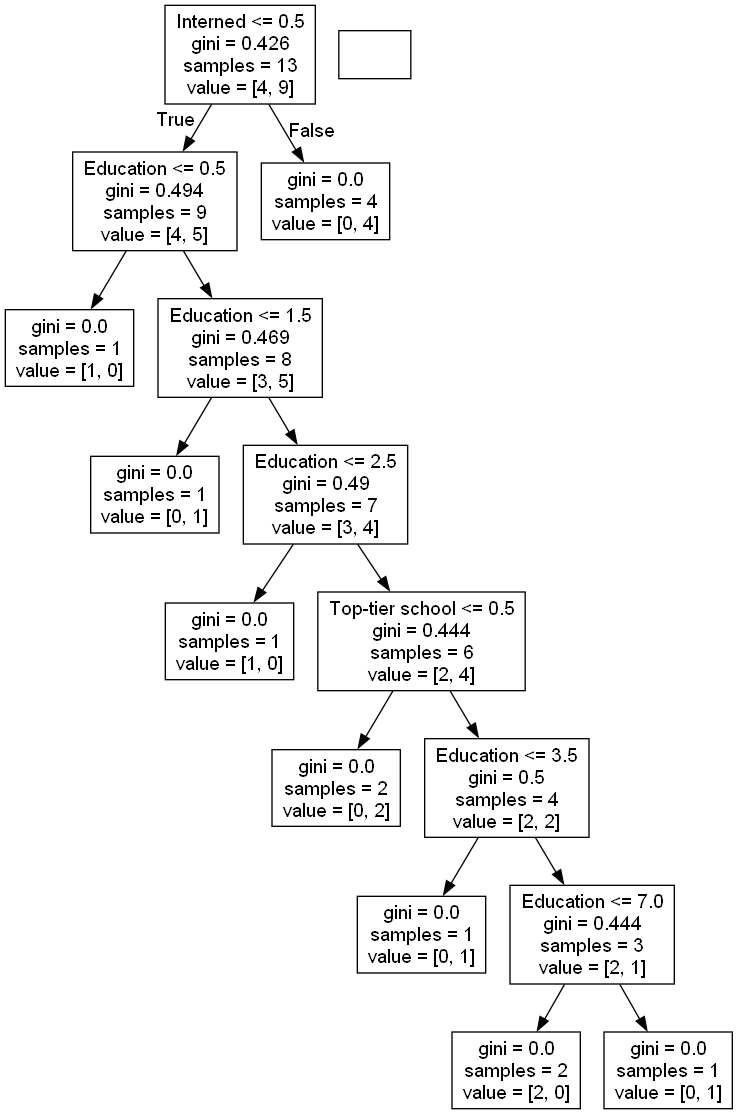

In [7]:
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus
from io import StringIO

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

In [8]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)

#Predict employment of an employed 10-year veteran
print (clf.predict([[1, 0, 0,]]))

#...and an unemployed 10-year veteran
print (clf.predict([[3, 0, 0]]))

[1]
[1]


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = df[features]
y = df['Hired']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, train_size = 0.8, random_state = 0)

In [10]:
print('test set: ' + str(x_test.shape))

test set: (3, 3)


In [11]:
print('train set:' + str(x_train.shape))

train set:(10, 3)


In [12]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
print(accuracy_score(y_test, model.predict(x_test)))

0.6666666666666666
